# Assignment 2

## Question 3

#### U.S. Chronic Disease Indicators dataset and National Cardiovascular Disease Surveillance dataset

Dataset: The Division of Population Health of the Centers for Disease Control and Prevention provides cross-cutting set of 124 chronic disease indicators that allows states and territories and large metropolitan areas of the US to uniformly define, collect, and report chronic disease data that are important to public health practice. 

Data Source:

- https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725/data

A crude rate is the number of new cases (or deaths) occurring in a specified population per year, usually expressed as the number of cases per 100,000 population at risk.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Exploratory Data Analysis (EDA)

In [2]:
#read the csv file using pandas
df=pd.read_csv("T:/data/U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory=False)

In [3]:
#list all the column names in the dataset
list(df.columns)

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'GeoLocation',
 'ResponseID',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

In [4]:
#set no limit on the number of columns that can be displayed
pd.set_option('display.max_columns', None)

#sample the first few rows
df.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,70,70.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-147.72205903599973 64.84507995700051),NaN,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,121,121.0,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-147.72205903599973 64.84507995700051),NaN,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


### Data Cleanup

- Only retain the data for the year 2020
- DataValueAlt contains the numeric value for each observation. For our analysis, we will remove all records where this numeric value is missing.

In [5]:
#filter rows where year is 2020
df = df[(df.YearStart == 2020)]

In [6]:
#drop columns with NaN for all rows
df=df.dropna(axis=1,how='all')

In [7]:
df.DataValueUnit.value_counts()

%         52835
Number     4350
$           162
Name: DataValueUnit, dtype: int64

In [8]:
#filter only percentage values
df = df[(df.DataValueUnit == '%')]

In [9]:
#drop other unnecessary columns 
df = df.drop(['LocationDesc', 'DataSource',
              'DatavalueFootnote','DataValueFootnoteSymbol',
              'LowConfidenceLimit','HighConfidenceLimit',
              'DataValueAlt','LocationID','YearStart','YearEnd',
              'GeoLocation','StratificationCategoryID1','DataValueUnit','DataValueTypeID'], axis=1)

In [10]:
#remove all the rows where data value is NaN or empty
df.dropna(subset=['DataValue'],inplace=True)
df.head(2)

,LocationAbbr,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,TopicID,QuestionID,StratificationID1
2308,TX,Asthma,Asthma prevalence among women aged 18-44 years,Crude Prevalence,9.9,Race/Ethnicity,Hispanic,AST,AST1_2,HIS
2311,PA,Oral Health,All teeth lost among adults aged >= 65 years,Crude Prevalence,14.6,Overall,Overall,ORH,ORH4_1,OVR


In [11]:
df.describe()

,LocationAbbr,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,TopicID,QuestionID,StratificationID1
count,33681,33681,33681,33681,33681,33681,33681,33681,33681,33681
unique,55,16,70,3,1007,3,8,16,70,8
top,NY,Diabetes,Prevalence of sufficient sleep among adults ag...,Crude Prevalence,0.0,Race/Ethnicity,Overall,DIA,OVC8_0,OVR
freq,767,4468,824,17754,137,16277,6518,4468,824,6518


### Plot breakdown

In [12]:
#count the number of Topic groups
numgroups = len(df.groupby('Topic'))
numgroups

16

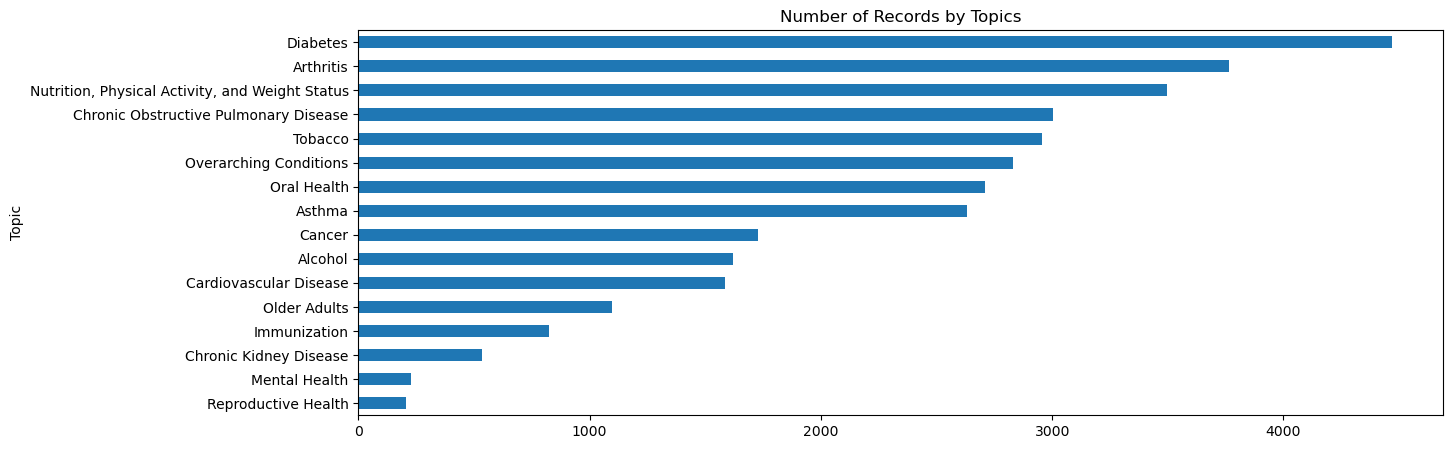

In [13]:
#group by topic and plot rows in the descending order
df.groupby('Topic').size().sort_values(ascending=True)\
    .plot(title="Number of Records by Topics", kind='barh',figsize=(14,5))
plt.show()

### Plot Questions by Number of Records

Visualize some of the most common questions in a plot.

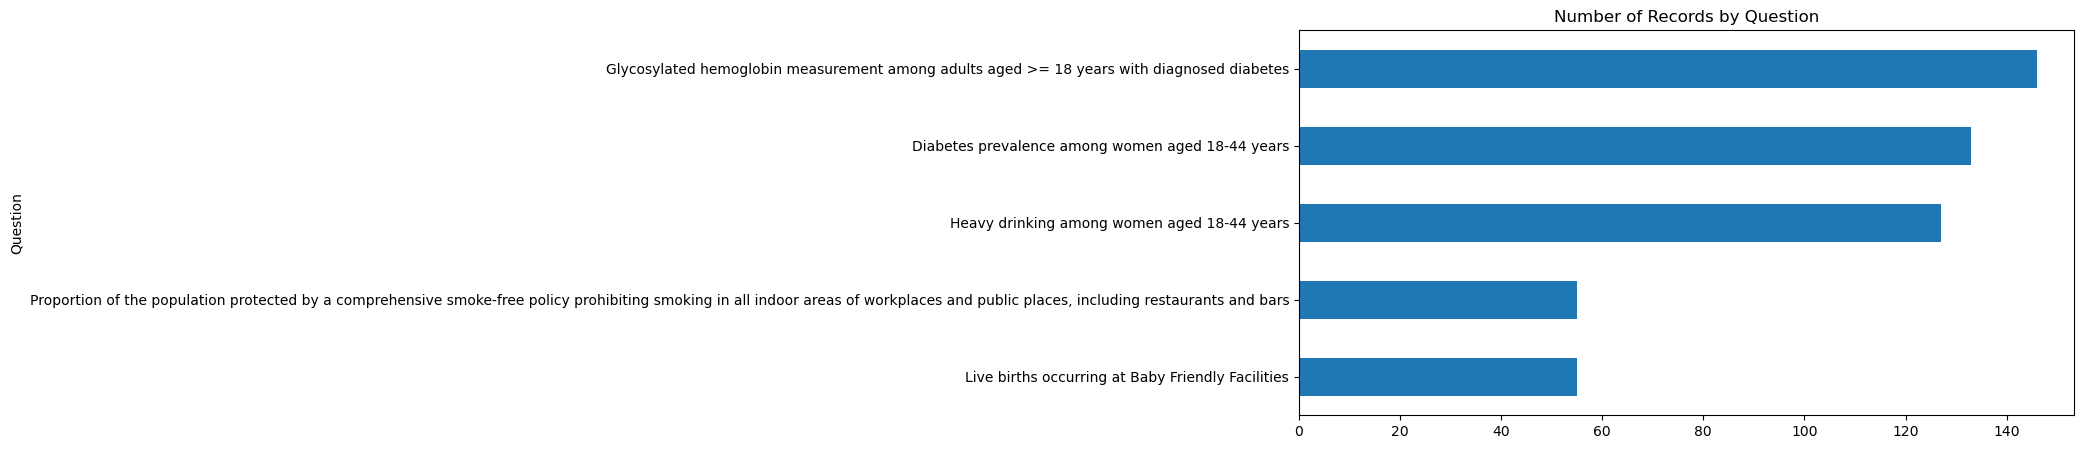

In [14]:
#plot counts of top 5 most common questions by number of records
df.groupby('Question').size().sort_values(ascending=True).head(5).plot(title="Number of Records by Question",kind='barh',figsize=(10,5))
plt.show()

#### Q1) How do the stats around preventative measures for Diabetes look in the population

In [15]:
#Filter by Crude Prevalence
df1 = df[(df.DataValueType == 'Crude Prevalence')]
#Filter by topic
df1 = df1[(df1.Topic == 'Diabetes')]
df1 = df1[(df1.StratificationID1 == 'OVR')]

In [16]:
df1.head(2)

,LocationAbbr,Topic,Question,DataValueType,DataValue,StratificationCategory1,Stratification1,TopicID,QuestionID,StratificationID1
1007965,NE,Diabetes,Diabetes prevalence among women aged 18-44 years,Crude Prevalence,7.2,Overall,Overall,DIA,DIA2_2,OVR
1023542,GA,Diabetes,Pneumococcal vaccination among noninstitutiona...,Crude Prevalence,77.1,Overall,Overall,DIA,DIA13_2,OVR


In [17]:
#filter questions around vaccination
df1 = df1[df1['Question'].str.contains("vaccination")]

In [18]:
df1.Question.unique()

array(['Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes'],
      dtype=object)

In [19]:
df1.QuestionID.unique()

array(['DIA13_2', 'DIA12_2', 'DIA13_1', 'DIA12_1'], dtype=object)

In [20]:
#filter questions for a specific age group
#df1 = df1[df1.QuestionID.isin(['DIA13_2', 'DIA12_2'])]

In [21]:
df1= df1[['LocationAbbr','QuestionID','DataValue']]
df1.head(5)

,LocationAbbr,QuestionID,DataValue
1023542,GA,DIA13_2,77.1
1023589,AZ,DIA12_2,65.9
1023975,DC,DIA13_1,42.8
1024507,AZ,DIA13_2,73.3
1024897,AR,DIA12_1,53.7


In [22]:
df11 = df1.pivot(index='LocationAbbr',columns=['QuestionID'], values=['DataValue'])
df11.head()

DataValue                        
QuestionID     DIA12_1 DIA12_2 DIA13_1 DIA13_2
LocationAbbr                                  
AK                53.8    63.1    43.1    71.8
AL                47.2    72.4    36.5    73.9
AR                53.7    76.3    48.6    79.1
AZ                51.2    65.9    35.4    73.3
CA                53.4    71.1    29.9    70.9

In [23]:
df11.columns = df11.columns.get_level_values(1)
df11.head()

QuestionID,DIA12_1,DIA12_2,DIA13_1,DIA13_2
LocationAbbr,,,,
AK,53.8,63.1,43.1,71.8
AL,47.2,72.4,36.5,73.9
AR,53.7,76.3,48.6,79.1
AZ,51.2,65.9,35.4,73.3
CA,53.4,71.1,29.9,70.9


### Cluster Analysis

In [24]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df11)
kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
df11['KMeans'] = pd.Series(kmeans.labels_, index=df11.index)
df11.head()

QuestionID,DIA12_1,DIA12_2,DIA13_1,DIA13_2,KMeans
LocationAbbr,,,,,
AK,53.8,63.1,43.1,71.8,0
AL,47.2,72.4,36.5,73.9,0
AR,53.7,76.3,48.6,79.1,1
AZ,51.2,65.9,35.4,73.3,0
CA,53.4,71.1,29.9,70.9,0


In [26]:
#remove k-Means
df11 = df11.drop(['KMeans'], axis=1)

In [27]:
df11.head()

QuestionID,DIA12_1,DIA12_2,DIA13_1,DIA13_2
LocationAbbr,,,,
AK,53.8,63.1,43.1,71.8
AL,47.2,72.4,36.5,73.9
AR,53.7,76.3,48.6,79.1
AZ,51.2,65.9,35.4,73.3
CA,53.4,71.1,29.9,70.9


In [28]:
df11.reset_index(inplace=True)
df11.head()

QuestionID,LocationAbbr,DIA12_1,DIA12_2,DIA13_1,DIA13_2
0,AK,53.8,63.1,43.1,71.8
1,AL,47.2,72.4,36.5,73.9
2,AR,53.7,76.3,48.6,79.1
3,AZ,51.2,65.9,35.4,73.3
4,CA,53.4,71.1,29.9,70.9


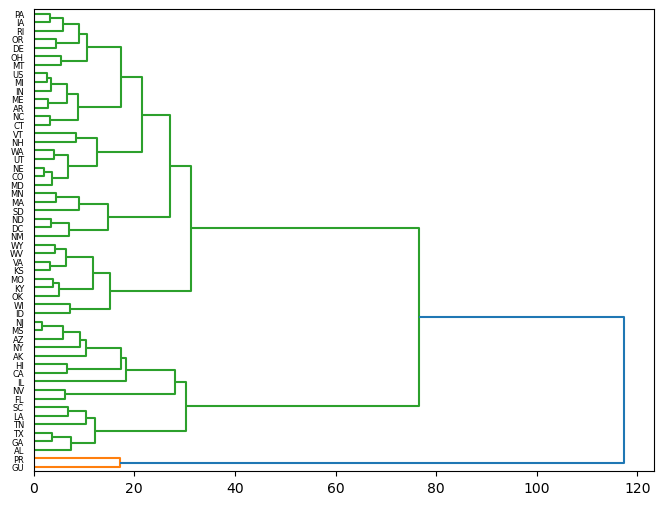

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

locations = df11['LocationAbbr']
X = df11.drop(['LocationAbbr'],axis=1)
Z = linkage(X, 'ward')
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
dn = dendrogram(Z,labels=locations.tolist(),orientation='right')
plt.show()